In [36]:
import requests
import json
import time
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

API_KEY = '1a9ea75b5f92dfda381d817fc00e5458' 
USER_AGENT = '808e0a8bbaf9d30bf181edb60c742824'  
LIMIT = 20  ##Número de resultados a obtener

headers = {
    'user-agent': USER_AGENT
}

##sacar top artists
def get_top_artists():
    params = {
        'method': 'chart.getTopArtists',
        'api_key': API_KEY,
        'format': 'json',
        'limit': LIMIT
    }
    response = requests.get('https://ws.audioscrobbler.com/2.0/', headers=headers, params=params)
    if response.status_code == 200:
        data = response.json()
        df = pd.json_normalize(data['artists']['artist'])
    else:
        print(f"Error en la solicitud de top artistas globales: {response.status_code}")
    time.sleep(1)
    return df

##sacar top artistas por pais
def get_top_artists_by_country(country):
    params = {
        'method': 'geo.getTopArtists',
        'country': country,
        'api_key': API_KEY,
        'format': 'json',
        'limit': LIMIT
    }
    response = requests.get('https://ws.audioscrobbler.com/2.0/', headers=headers, params=params)
    if response.status_code == 200:
        data = response.json()
        df = pd.json_normalize(data['topartists']['artist'])
    else:
        print(f"Error en la solicitud de top artistas por país: {response.status_code}")
    time.sleep(1)
    return df

##sacar top canciones por pais
def get_top_tracks_by_country(country):
    params = {
        'method': 'geo.getTopTracks',
        'country': country,
        'api_key': API_KEY,
        'format': 'json',
        'limit': LIMIT
    }
    response = requests.get('https://ws.audioscrobbler.com/2.0/', headers=headers, params=params)
    if response.status_code == 200:
        data = response.json()
        df = pd.json_normalize(data['tracks']['track'])
    else:
        print(f"Error en la solicitud de top canciones por país: {response.status_code}")
    time.sleep(1)
    return df

##sacar top album de x artista
def get_top_albums_by_artist(artist):
    params = {
        'method': 'artist.getTopAlbums',
        'artist': artist,
        'api_key': API_KEY,
        'format': 'json',
        'limit': LIMIT
    }
    response = requests.get('https://ws.audioscrobbler.com/2.0/', headers=headers, params=params)
    if response.status_code == 200:
        data = response.json()
        df = pd.json_normalize(data['topalbums']['album'])
    else:
        print(f"Error en la solicitud de top álbumes del artista: {response.status_code}")
    time.sleep(1)
    return df

##limpia y ordena dataframe
def limpiar_y_ordenar(df, columnas_a_eliminar=None):
    if columnas_a_eliminar:
        df = df.drop(columns=columnas_a_eliminar)
    if 'listeners' in df.columns:
        df = df.sort_values(by='listeners', ascending=False)
    df = df.reset_index(drop=True)
    return df

In [10]:
df_top_artist = get_top_artists()
df_top_artist

,name,playcount,listeners,mbid,url,streamable,image
0,Kendrick Lamar,819356912,4428964,381086ea-f511-4aba-bdf9-71c753dc5077,https://www.last.fm/music/Kendrick+Lamar,0,[{'#text': 'https://lastfm.freetls.fastly.net/...
1,Lady Gaga,744772608,6731269,650e7db6-b795-4eb5-a702-5ea2fc46c848,https://www.last.fm/music/Lady+Gaga,0,[{'#text': 'https://lastfm.freetls.fastly.net/...
2,The Weeknd,874747087,4594996,c8b03190-306c-4120-bb0b-6f2ebfc06ea9,https://www.last.fm/music/The+Weeknd,0,[{'#text': 'https://lastfm.freetls.fastly.net/...
3,"Tyler, the Creator",788702964,3634693,f6beac20-5dfe-4d1f-ae02-0b0a740aafd6,"https://www.last.fm/music/Tyler,+the+Creator",0,[{'#text': 'https://lastfm.freetls.fastly.net/...
4,Billie Eilish,648073441,3590920,,https://www.last.fm/music/Billie+Eilish,0,[{'#text': 'https://lastfm.freetls.fastly.net/...
5,Charli XCX,521097708,3145837,260b6184-8828-48eb-945c-bc4cb6fc34ca,https://www.last.fm/music/Charli+XCX,0,[{'#text': 'https://lastfm.freetls.fastly.net/...
6,Radiohead,1034828999,7169431,a74b1b7f-71a5-4011-9441-d0b5e4122711,https://www.last.fm/music/Radiohead,0,[{'#text': 'https://lastfm.freetls.fastly.net/...
7,Lana Del Rey,1233400021,4594635,b7539c32-53e7-4908-bda3-81449c367da6,https://www.last.fm/music/Lana+Del+Rey,0,[{'#text': 'https://lastfm.freetls.fastly.net/...
8,Rihanna,452387751,7326583,db36a76f-4cdf-43ac-8cd0-5e48092d2bae,https://www.last.fm/music/Rihanna,0,[{'#text': 'https://lastfm.freetls.fastly.net/...
9,Kanye West,1241167648,7143728,164f0d73-1234-4e2c-8743-d77bf2191051,https://www.last.fm/music/Kanye+West,0,[{'#text': 'https://lastfm.freetls.fastly.net/...


In [38]:
limpiar_y_ordenar(df_top_artist, ["mbid", "url", "streamable", "image"])

,name,playcount,listeners
0,Rihanna,452387751,7326583
1,Radiohead,1034828999,7169431
2,Kanye West,1241167648,7143728
3,Lady Gaga,744772608,6731269
4,The Weeknd,874747087,4594996
5,Lana Del Rey,1233400021,4594635
6,Kendrick Lamar,819356912,4428964
7,"Tyler, the Creator",788702964,3634693
8,Billie Eilish,648073441,3590920
9,Charli XCX,521097708,3145837


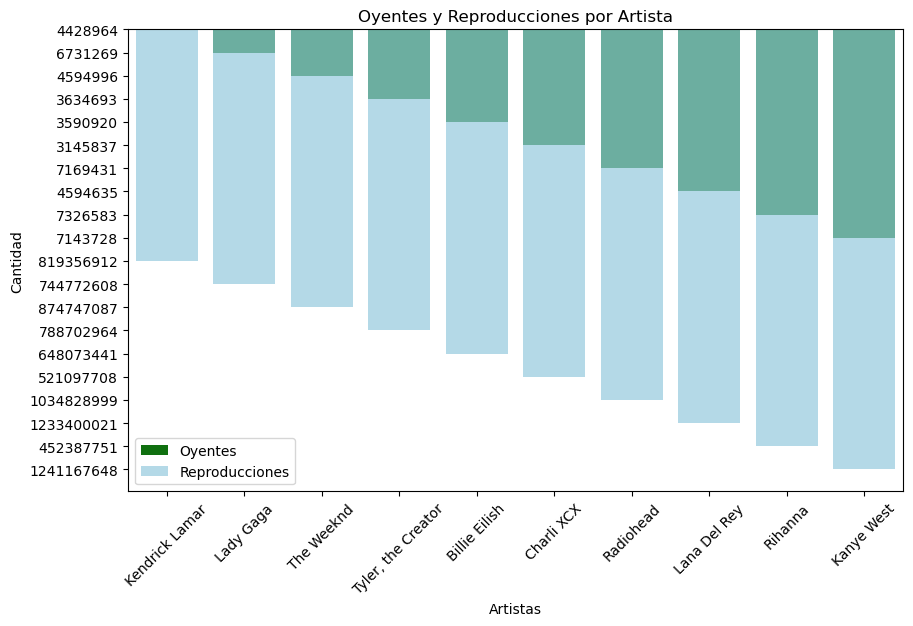

In [40]:
# Crear gráfica de barras agrupadas
plt.figure(figsize=(10, 6))
sns.barplot(x="name", y="listeners", data=df_top_artist, color="green", label="Oyentes")
sns.barplot(x="name", y="playcount", data=df_top_artist, color="skyblue", alpha=0.7, label="Reproducciones")

# Personalización del gráfico
plt.xlabel("Artistas")
plt.ylabel("Cantidad")
plt.title("Oyentes y Reproducciones por Artista")
plt.legend()
plt.xticks(rotation=45)  # Rotar los nombres para mejor legibilidad
plt.show()

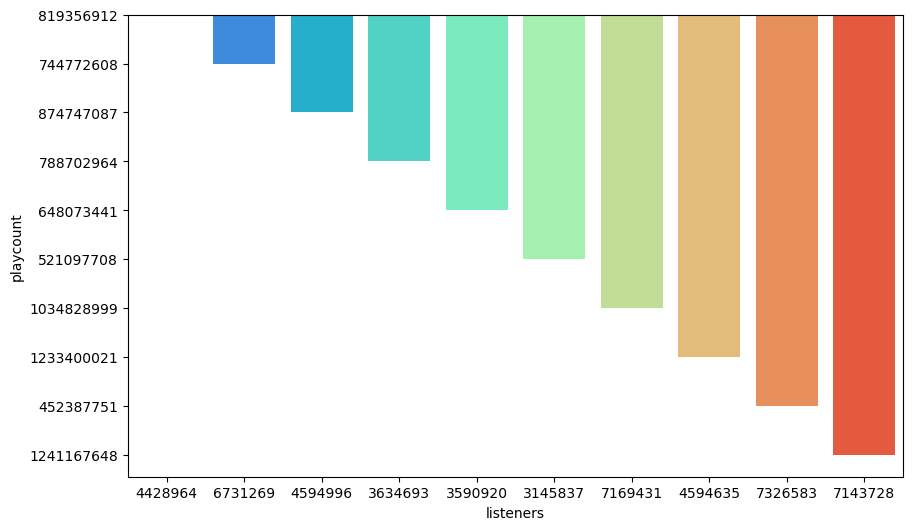

In [50]:
# plt.figure(figsize=(10, 6))
# sns.barplot(x="listeners", y="playcount", hue="name", data=df_top_artist, s=100)

# plt.xlabel("Oyentes")
# plt.ylabel("Reproducciones")
# plt.title("Relación entre Oyentes y Reproducciones por Artista")
# plt.show()

fig, ax = plt.subplots(figsize = (10, 6))

sns.barplot(x = "listeners", y = "playcount", hue = "name", data = df_top_artist, palette = "rainbow")

ax.legend_.remove()
plt.show()

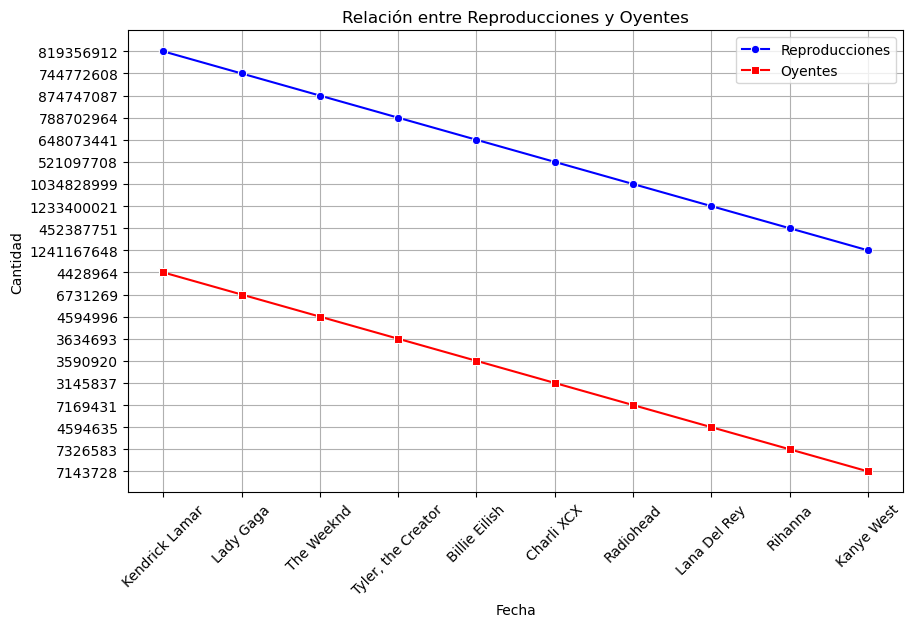

In [60]:
# Crear gráfico de líneas
plt.figure(figsize=(10, 6))
sns.lineplot(x="name", y="playcount", data=df_top_artist, marker="o", label="Reproducciones", color="blue")
sns.lineplot(x="name", y="listeners", data=df_top_artist, marker="s", label="Oyentes", color="red")

# Personalización del gráfico
plt.xlabel("Fecha")
plt.ylabel("Cantidad")
plt.title("Relación entre Reproducciones y Oyentes")
plt.legend()
plt.xticks(rotation=45)
plt.grid()

plt.show()

In [5]:
df_artist_UK = get_top_artists_by_country("United Kingdom")
df_artist_USA = get_top_artists_by_country("United States")
df_artist_RUS = get_top_artists_by_country("Russian Federation")
df_artist_DE = get_top_artists_by_country("Germany")
df_artist_FR = get_top_artists_by_country("France")

In [6]:
df_sia = get_top_albums_by_artist("Sia")
df_billie = get_top_albums_by_artist("Billie Eilish")